# Paper implementation : "Changepoint prediction in the presence of outliers"

## When the signal has many outliers, classical change point detection methods fail

We first try classical methods of changepoint detection using the package [Ruptures](https://centre-borelli.github.io/ruptures-docs/).

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import ruptures as rpt
import seaborn as sns

In [107]:
#utils

def bwl(y,theta,K):
    if np.abs(y-theta) <= K:
        return (y-theta)**2
    else:
        return K**2
    
    
def huber(y,theta,K):
    if np.abs(y-theta) <= K:
        return (y-theta)**2
    else:
        return 2*K*np.abs(y-theta) - K**2
    
    
def l1(y,theta):
    return np.abs(y-theta)

    
def add_outliers(n_outliers,signal):
    sig_length = signal.size
    outliers = np.random.choice(np.arange(1,sig_length),n_outliers,replace=False)
    test = np.zeros(sig_length)
    test[outliers] = 1
    test = test*np.random.choice([-1,1], sig_length)*np.random.choice(np.arange(3,10),sig_length)*signal.mean()
    test = test.reshape(1000,1)
    signal = signal + test
    return signal

In [95]:
n_samples, n_dims, sigma = 1000, 1, 2
n_bkps = 4  # number of breakpoints
signal, bkps = rpt.pw_constant(n_samples, n_dims, n_bkps, noise_std=sigma)

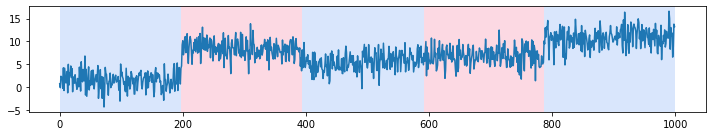

In [96]:
fig, ax_array = rpt.display(signal, bkps)

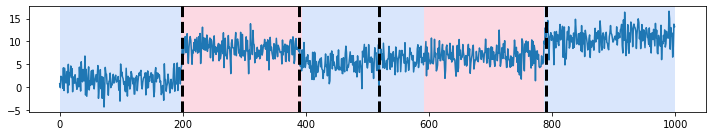

In [101]:
algo = rpt.Dynp(model="l2").fit(signal)
result = algo.predict(n_bkps=4)
rpt.display(signal, bkps, result)
plt.show()

In [103]:
new_sig = add_outliers(100,signal)

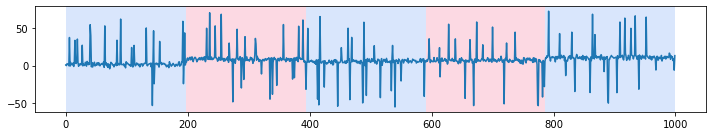

In [104]:
fig, ax_array = rpt.display(new_sig, bkps)

In [105]:
algo = rpt.Dynp(model="l2").fit(new_sig)
result = algo.predict(n_bkps=4)

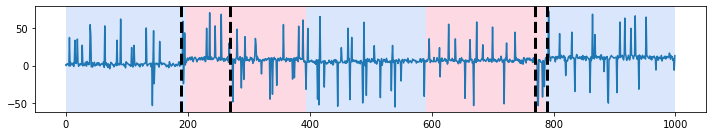

In [106]:
rpt.display(new_sig, bkps, result)
plt.show()

As one can see, classical changepoint methods fail when the signal has many outliers.

## R-FPOP :  an algorithm robust to outliers

In [ ]:
class rfpop:
    
    def __init__(self,loss,penalty):
        if loss == 'bwl':
            self.loss = bwl
        if loss == 'huber':
            self.loss = huber
        if loss =='l1':
            self.loss = l1
    
    def fit(self,signal,penalty,K):
        n = signal.size
        q
        for t in np.arange(1,n): 
            


In [ ]:
def alg2(Qt_star, tau_stqr, gammat):
    Qt, tau = [], []
    Nt = 0
    i = 0
    j = 0
    while i < len(Qt_star) and j < gammat:
        Nt += 1
        a, b = np.max(Qt_star[i][0][0], gammat[j][0][0]), np.min(Qt_star[i][0][1], gammat[j][0][1])
        f = lambda x: Qt_star[i][1](x) + gammat[i][1](x)
        Qt.append(((a,b), f))
        tau.append(tau[i])
        if b == Qt_star[i][0][1]:
            i += 1
        else:
            j += 1
    return Qt, tau

s = [((-np.inf, 4), lambda x:x**2), ((4, np.inf), lambda x:-x**2+4)]
alg2(s, [1], s)

def alg3(Qt, tau):
    Qt_min = np.inf
    tau_min = 0
    i = 0
    for (a, b), params in Qt:
        # compute min TODO
        m = None
        if m < Qt_min:
            Qt_min = m
            tau_min = tau[i]
        i += 1
    return Qt_min, tau_min

def alg4(Qt, tau, C):
    Qt_star = []
    i = 0
    for (a, b), params in Qt:
        roots = # 
        r = [a] + sorted(roots) + [b]
        i += 1
        for j in range(len(r)):
            
            